In [1]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
import numpy as np
import mglearn

Text(0,0.5,'feature 2')

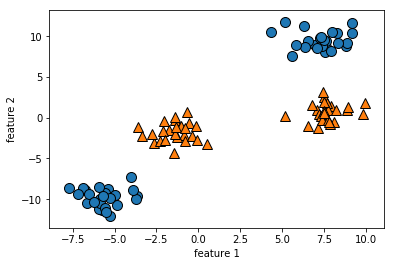

In [2]:
X, y = make_blobs(centers = 4, random_state = 8)
y = y%2

mglearn.discrete_scatter(X[:,0], X[:, 1], y)
plt.xlabel('feature 1')
plt.ylabel('feature 2')

#### blob_data cannot be classified with linear line

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0,0.5,'feature 1')

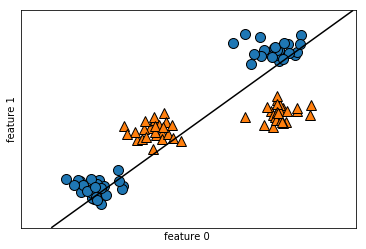

In [3]:
linear_svm = LinearSVC().fit(X,y)
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('feature 0 ')
plt.ylabel('feature 1')

#### Then, expand the number of features into 3. 
<br> Add extra feature using `X[:,1]**2`

Text(0.5,0,'feature2')

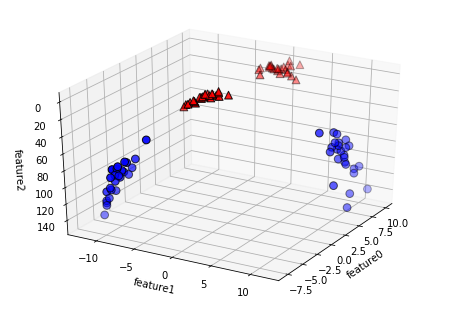

In [4]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

X_new = np.hstack([X, X[:,1:]**2])

figure = plt.figure()
ax = Axes3D(figure, elev = -150, azim = -30) #3d graph

label0 = y ==0
ax.scatter(X_new[label0, 0], X_new[label0, 1], X_new[label0, 2], c = 'b', cmap = mglearn.cm2, s =60, edgecolor = 'k')
ax.scatter(X_new[~label0, 0], X_new[~label0, 1], X_new[~label0, 2], c = 'r', marker = '^',cmap = mglearn.cm2, s =60, edgecolor = 'k')
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature2')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


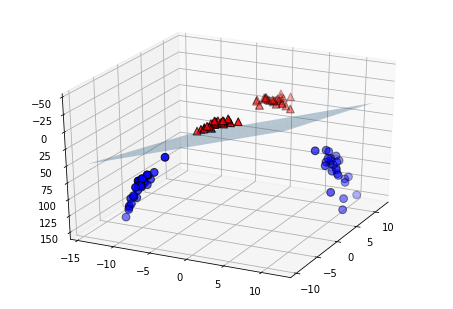

In [5]:
linear_svm_3d = LinearSVC().fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim = -26)
xx = np.linspace(X_new[:,0].min() - 2, X_new[:,0].max() + 2, 50)
yy = np.linspace(X_new[:,1].min() - 2, X_new[:,0].max() + 2, 50)

XX, YY =np.meshgrid(xx,yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX,YY,ZZ,rstride = 8, cstride = 8, alpha = .3)
ax.scatter(X_new[label0, 0], X_new[label0, 1], X_new[label0, 2], c = 'b', cmap = mglearn.cm2, s =60, edgecolor = 'k')
ax.scatter(X_new[~label0, 0], X_new[~label0, 1], X_new[~label0, 2], c = 'r', marker = '^',cmap = mglearn.cm2, s =60, edgecolor = 'k')

### Decision Boundary

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'alhpa'
  s)


Text(0,0.5,'feature 1')

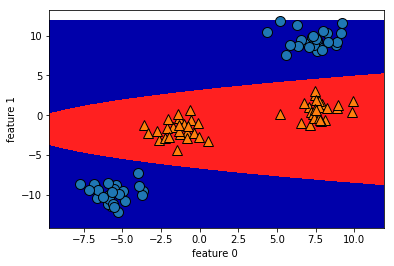

In [6]:
ZZ = YY **2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels = [dec.min(), 0,dec.max()],cmap = mglearn.cm2, alhpa = .5)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel('feature 0 ')
plt.ylabel('feature 1')

### MLP 

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

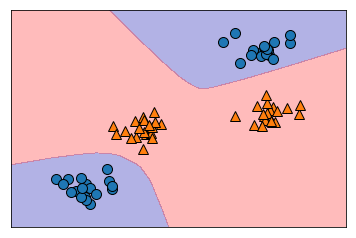

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 4)
mlp = MLPClassifier(solver = 'lbfgs', random_state = 0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

### Support Vector Utilizing

#### support vector is a data point which is poisitoned between two labels

In [37]:
svm.dual_coef_

array([[-10.        ,  -6.25178295,  -3.73381586,  10.        ,
          9.98559881]])

Text(0,0.5,'feature1')

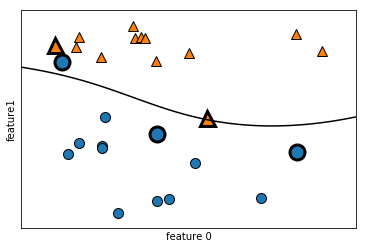

In [36]:
from sklearn.svm import SVC
X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = 'rbf', C=10, gamma =.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps = .5) #separator
mglearn.discrete_scatter(X[:,0], X[:,1], y )
sv = svm.support_vectors_

sv_labels = svm.dual_coef_.ravel()>0 #each point's importance
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s = 15, markeredgewidth =3) #support vector
plt.xlabel('feature 0')
plt.ylabel('feature1')

Gamma decides the range of train sample. The bigger the gamma is, the smaller the influence would be. 
<br>C restricts the dual_coef_ (importance rate).
<BR> Gamma의 경우 작을 수록 가우시안 분포를 넓게 잡기 때문에 더 많은 training data를 포함함. 하지만 클 수록 complexity가 높아짐.
<br> C의 경우 커질수록 SV에 민감하기 때문에 잘못 분류된 데이터에 대해 영향을 많이 받음

-1 [[-10.          -6.25178295  -3.73381586  10.           9.98559881]]
-1 [[-10.          -6.25178295  -3.73381586  10.           9.98559881]]
-1 [[-10.          -6.25178295  -3.73381586  10.           9.98559881]]
0 [[-10.          -6.25178295  -3.73381586  10.           9.98559881]]
0 [[-10.          -6.25178295  -3.73381586  10.           9.98559881]]
0 [[-10.          -6.25178295  -3.73381586  10.           9.98559881]]
3 [[-10.          -6.25178295  -3.73381586  10.           9.98559881]]
3 [[-10.          -6.25178295  -3.73381586  10.           9.98559881]]
3 [[-10.          -6.25178295  -3.73381586  10.           9.98559881]]


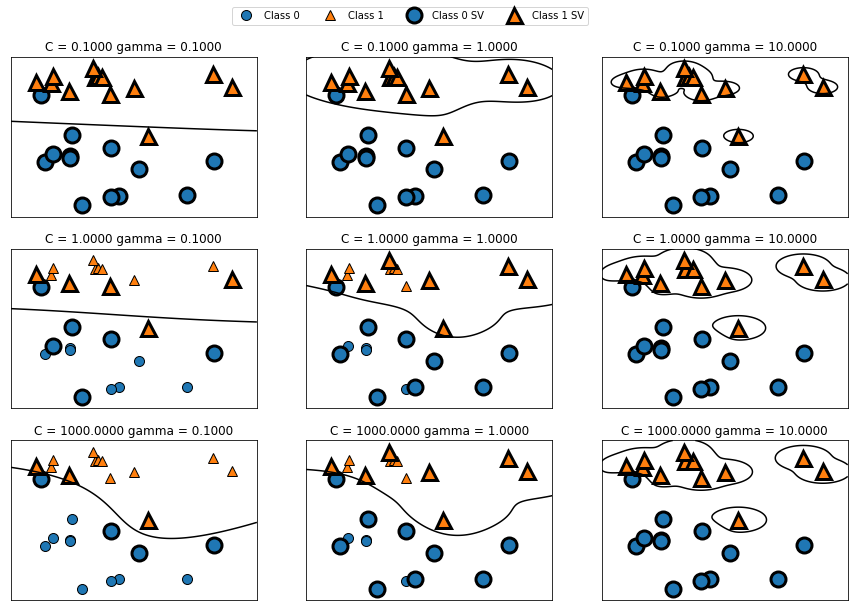

In [38]:
fig, axes = plt.subplots(3,3, figsize = (15,10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax = a)
        print(C, svm.dual_coef_)
axes[0,0].legend(['Class 0', 'Class 1', 'Class 0 SV', 'Class 1 SV'], ncol = 4, loc = (.9,1.2))

### Preprocessing Data 
It is important to set the same range within features. 

In [70]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [71]:
def process(data):
    X = []
    for i in range(data.shape[1]):
        col = data[:,i].reshape(data.shape[0],-1)
        std = np.std(col)
        col_1 = (col-np.mean(col))/np.std(col)
        X.append(list(col_1))
    X = np.array(X).squeeze()
    return(X.T)

In [110]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(process(cancer.data), y, random_state = 0)

svm = SVC(C = 10, gamma = 'auto')
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.993006993006993